In [9]:
# Sensor fault detection EDA

## load the data into the dataframe

df = pd.read_csv('aps_failure_training_set1.csv',na_values='na' )

In [4]:
!conda install jupyter

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



In [8]:
import pandas as pd
import numpy as np

In [6]:
!pip install numpy
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 8.5 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 8.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 kB 7.0 MB/s eta 0:00:00a 0:00:01


In [10]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,182.0,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2926.0,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1594.0,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN


In [13]:
df.shape

(36188, 171)

In [14]:
df.columns.to_list()

['class',
 'aa_000',
 'ab_000',
 'ac_000',
 'ad_000',
 'ae_000',
 'af_000',
 'ag_000',
 'ag_001',
 'ag_002',
 'ag_003',
 'ag_004',
 'ag_005',
 'ag_006',
 'ag_007',
 'ag_008',
 'ag_009',
 'ah_000',
 'ai_000',
 'aj_000',
 'ak_000',
 'al_000',
 'am_0',
 'an_000',
 'ao_000',
 'ap_000',
 'aq_000',
 'ar_000',
 'as_000',
 'at_000',
 'au_000',
 'av_000',
 'ax_000',
 'ay_000',
 'ay_001',
 'ay_002',
 'ay_003',
 'ay_004',
 'ay_005',
 'ay_006',
 'ay_007',
 'ay_008',
 'ay_009',
 'az_000',
 'az_001',
 'az_002',
 'az_003',
 'az_004',
 'az_005',
 'az_006',
 'az_007',
 'az_008',
 'az_009',
 'ba_000',
 'ba_001',
 'ba_002',
 'ba_003',
 'ba_004',
 'ba_005',
 'ba_006',
 'ba_007',
 'ba_008',
 'ba_009',
 'bb_000',
 'bc_000',
 'bd_000',
 'be_000',
 'bf_000',
 'bg_000',
 'bh_000',
 'bi_000',
 'bj_000',
 'bk_000',
 'bl_000',
 'bm_000',
 'bn_000',
 'bo_000',
 'bp_000',
 'bq_000',
 'br_000',
 'bs_000',
 'bt_000',
 'bu_000',
 'bv_000',
 'bx_000',
 'by_000',
 'bz_000',
 'ca_000',
 'cb_000',
 'cc_000',
 'cd_000',
 '

In [15]:
df['class'].value_counts()

neg    35188
pos     1000
Name: class, dtype: int64

In [16]:
df['class'].dtype

dtype('O')

In [17]:
# check for categorical and continuous variables
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
category_features = [feature for feature in df.columns if df[feature].dtype == "O"]

#Print the findings

print(f"we have {len(numerical_features)},{numerical_features} numerical features")
print(f"we have {len(category_features)}, {category_features} numerical features")



we have 170,['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000', 'cm_000',

In [19]:
## Intepretation is not required as it is the sensor data

df.isna().sum().reset_index()

,index,0
0,class,0
1,aa_000,0
2,ab_000,27896
3,ac_000,2141
4,ad_000,9200
...,...,...
166,ee_007,379
167,ee_008,379
168,ee_009,379
169,ef_000,1730


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
!pip install seaborn
!pip install matplotlib

  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)


<AxesSubplot:>

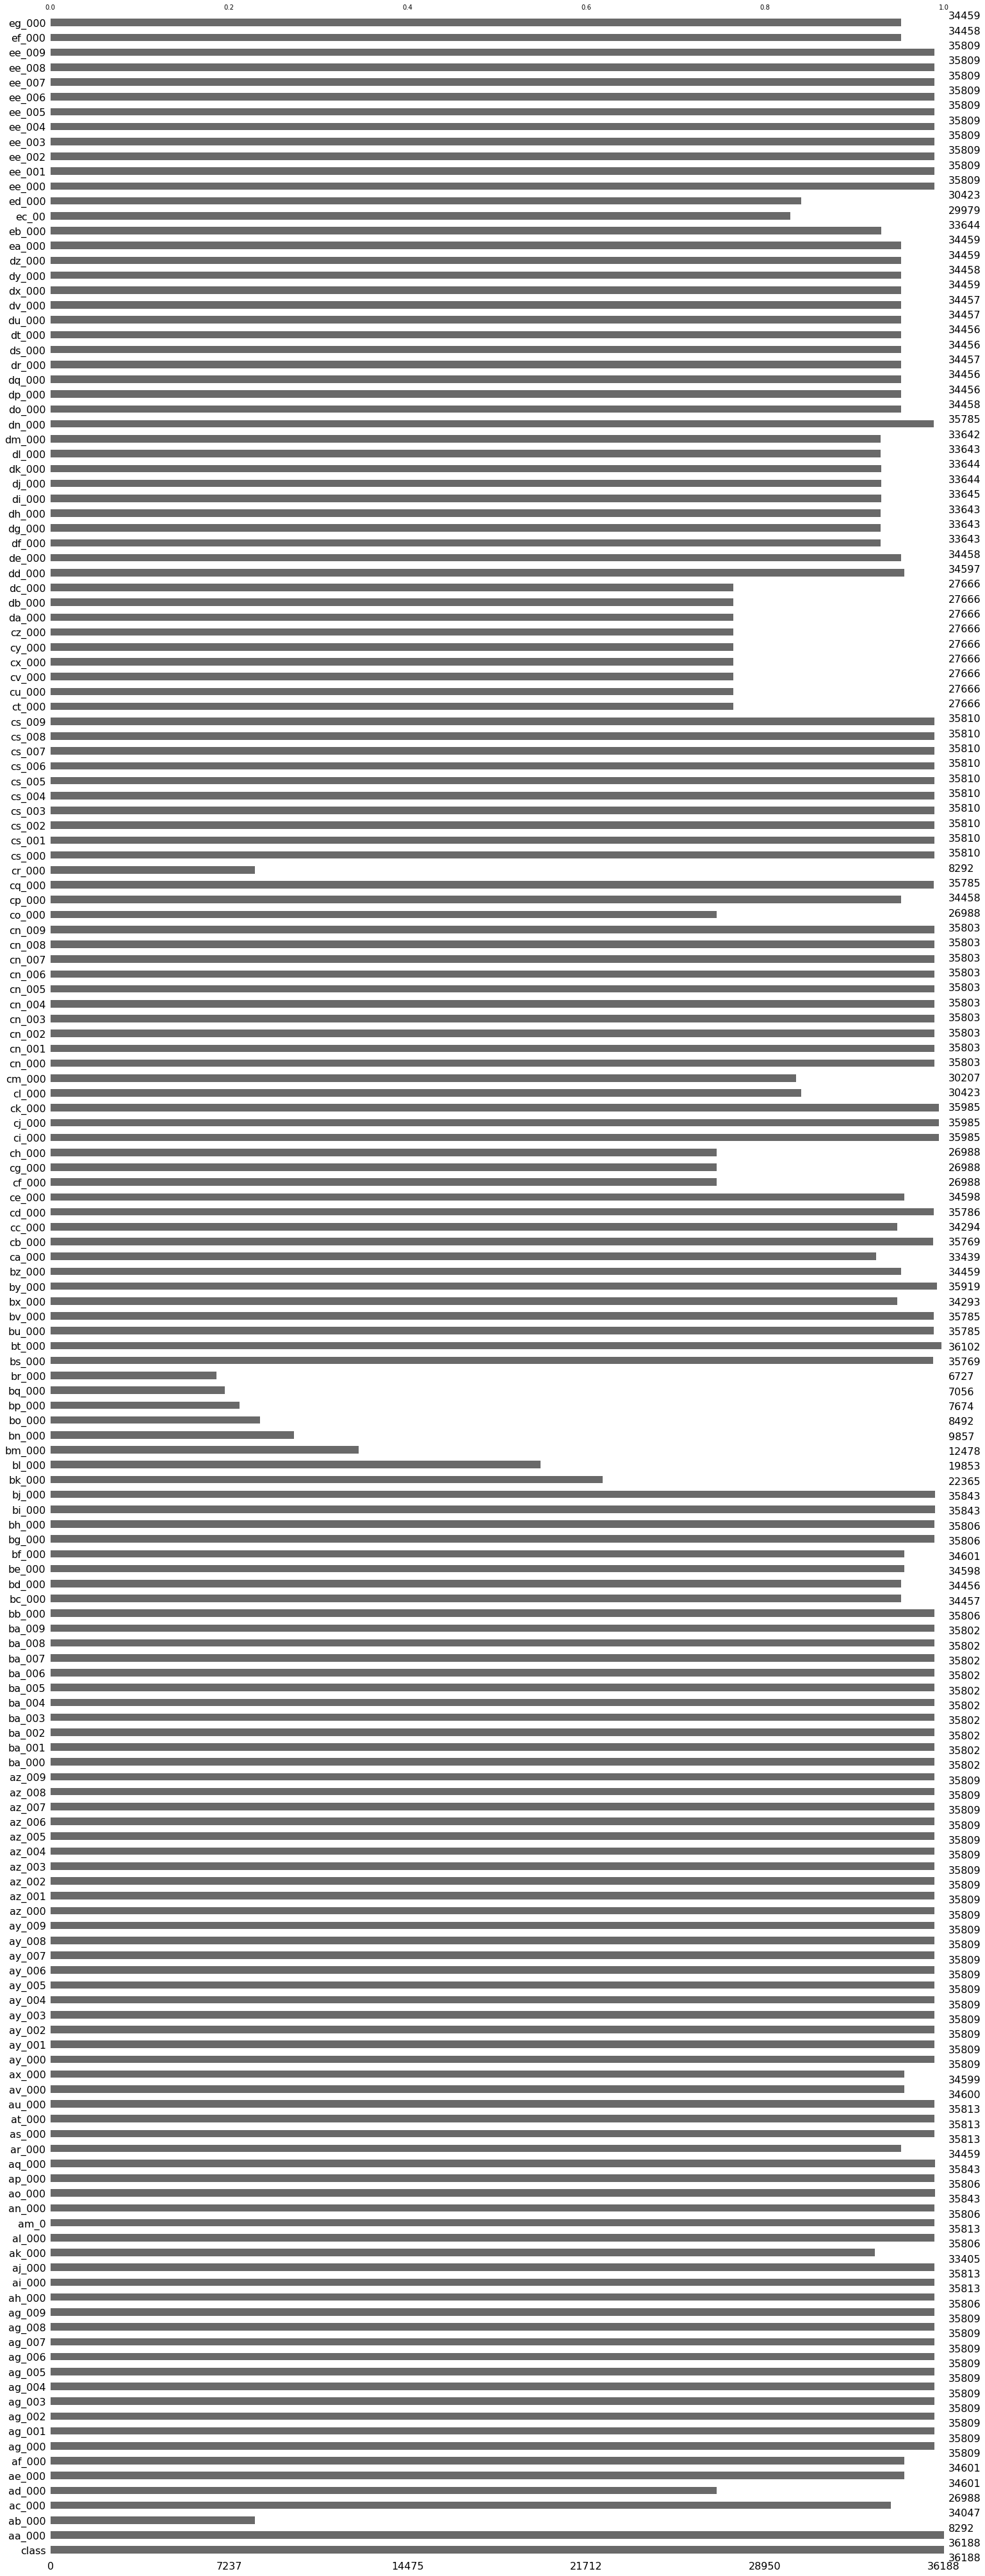

In [31]:
msno.bar(df)

In [24]:
df.shape[0]

36188

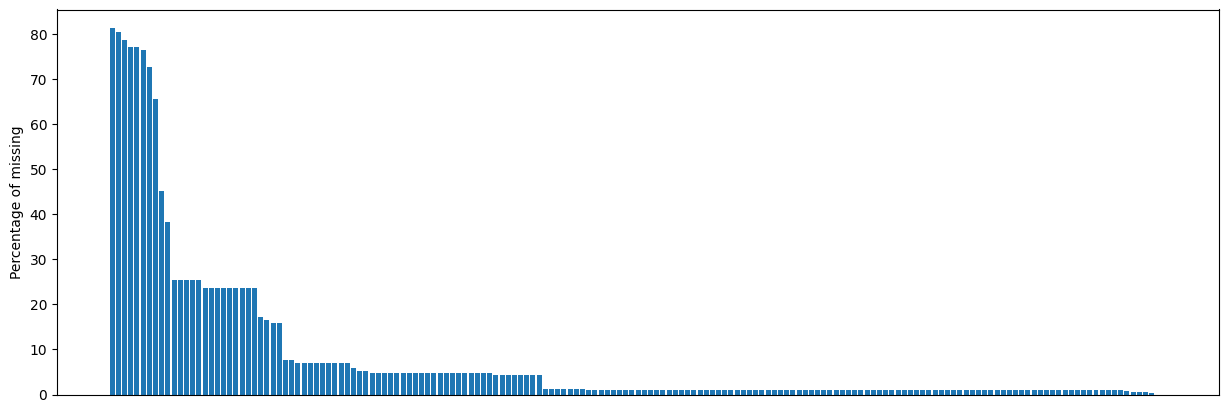

In [25]:
fig, ax = plt.subplots(figsize=(15,5))
missing =df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False)
ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage of missing")
plt.show()

In [26]:
missing

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
...,...
cj_000,0.560959
ci_000,0.560959
bt_000,0.237648
aa_000,0.000000


In [27]:
#Dropping columns with more than 70% of missing values
dropcols = missing[missing[0]>70]
dropcols

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [28]:
df.drop(list(dropcols.index),axis=1,inplace=True)

In [29]:
df.shape

(36188, 164)

In [30]:
total_missing_cells=df.isnull().sum().sum()
total_cells = np.product(df.shape)

percentage_missing_cells = (total_missing_cells/total_cells) * 100

print(f"Total missing cells {percentage_missing_cells}")

Total missing cells 5.37059852747306


neg    35188
pos     1000
Name: class, dtype: int64


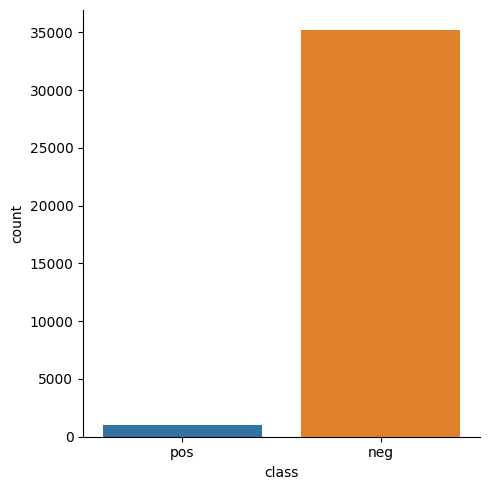

In [31]:
#Visualising the unique values in Target variable

print(df['class'].value_counts())

sns.catplot(data=df, x='class', kind='count')

/Users/wilson/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/wilson/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/wilson/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

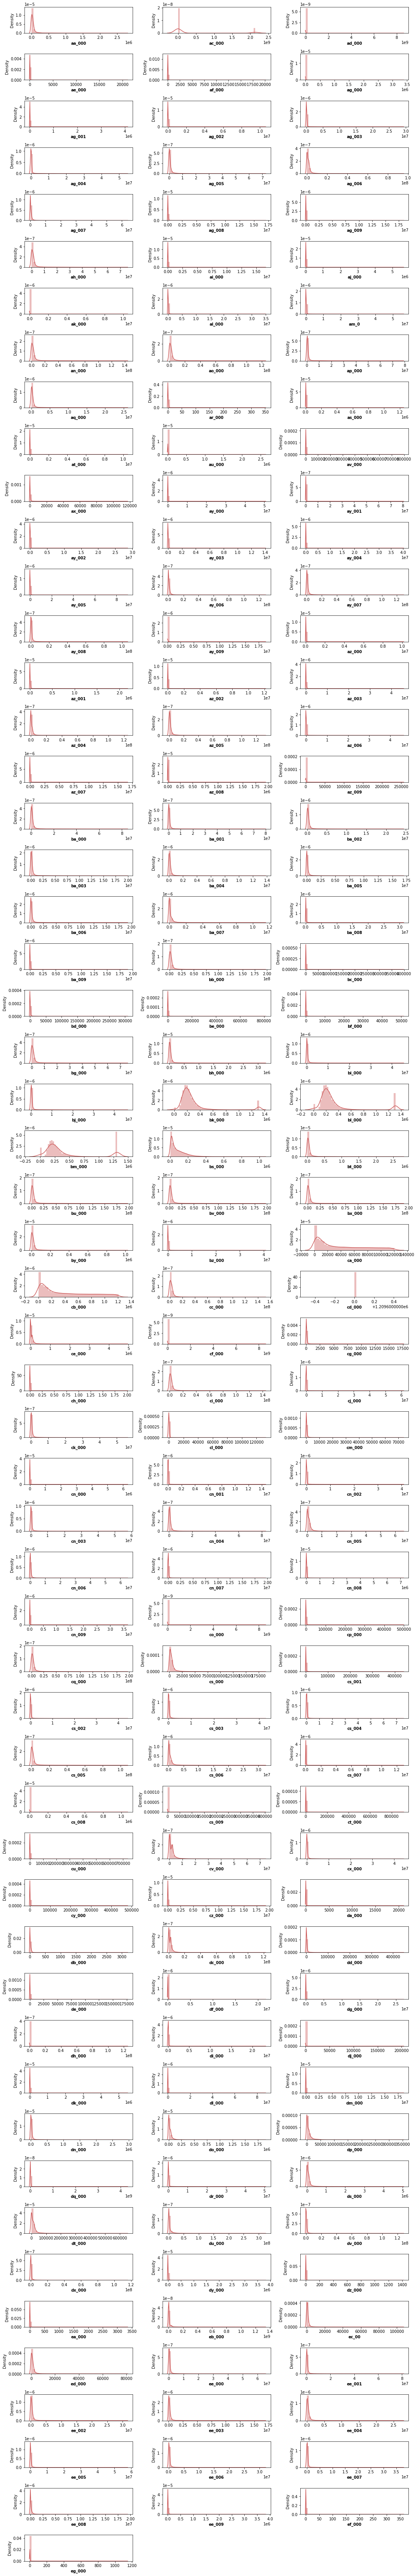

In [22]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [32]:
#Evaluating model on different experiments

X = df.drop('class', axis=1)
y = df['class']

In [33]:
y = y.replace({'pos':1, 'neg':0})

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

In [34]:
!pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 8.6 MB/s eta 0:00:0000:0100:01
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 6.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 8.3 MB/s eta 0:00:0000:0100:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1304 sha256=9c8114033777c955b2e53553cb9d0884a0878b277b66162d96000caf66d11238
  Stored in directory: /Users/wilson/Library/Caches/pip/wheels/f5/d9/b2/a9d58f54cfa2235cb19895aeb4e5d8488667c0536c7248f212
Successfully built sklearn


/Users/wilson/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/wilson/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/wilson/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

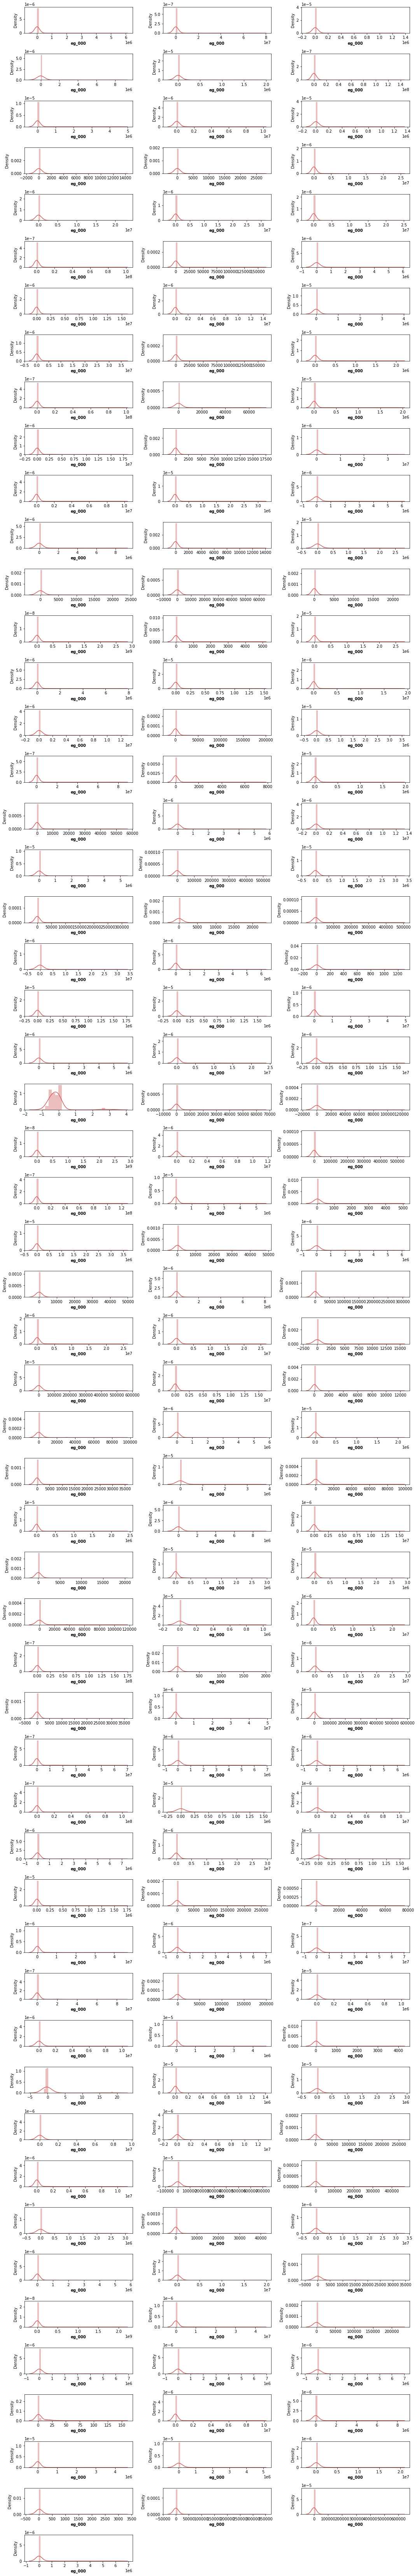

In [26]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
feature_range = len(range(X1.shape[1]))
plt.figure(figsize=(15, 100))
for i in range(feature_range):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=X1[i], color='indianred')    
    plt.xlabel(col, weight='bold')
    plt.tight_layout()
   

In [49]:
##KNN imputer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

results = []

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric = 'nan_euclidean',)

strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps = [('i', KNNImputer(n_neighbors=int(s))),('m',LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring='accuracy',cv=2, n_jobs=1)     
    results.append(scores) 
    print(s, np.mean(scores))               
                                


/Users/wilson/opt/anaconda3/envs/data_analytics/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wilson/opt/anaconda3/envs/data_analytics/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

1 0.7350502929147784


/Users/wilson/opt/anaconda3/envs/data_analytics/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wilson/opt/anaconda3/envs/data_analytics/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

3 0.7314855753288383


/Users/wilson/opt/anaconda3/envs/data_analytics/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wilson/opt/anaconda3/envs/data_analytics/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

5 0.7099038355255887


KeyboardInterrupt: 

In [38]:
#Use the learnt feature in the data
##KNN imputer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


num_features = X.select_dtypes(exclude='object').columns

knn_pipeline = Pipeline(steps = [('imputer', KNNImputer(n_neighbors=3)),
                                 ('RobustScaler', RobustScaler())
                                 ])

In [39]:
X_knn = knn_pipeline.fit_transform(X)

In [36]:
!pip install imblearn


  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 3.3 MB/s eta 0:00:0000:01


In [40]:
##Handline Imbalanced Data

from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42, sampling_strategy="minority",n_jobs=-1)

X_res, y_res = smt.fit_resample(X_knn, y)

In [44]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [47]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "LogisticRegression": LogisticRegression(), 
    "K-Neighbour classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(verbose = False),
    "AdaBoostClassifier": AdaBoostClassifier()
}

In [48]:
def evaluate_clf (true, predicted):
    
    acc = accuracy_score(true, predicted),
    f1 = f1_score(true, predicted),
    precision = precision_score(true, predicted),
    recall = recall_score(true, predicted),
    roc_auc = roc_auc_score(true, predicted)
    
    return acc, f1, precision, recall, roc_auc

In [49]:
def total_cost(y_true, y_pred):
    
    tn,fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    cost  = 10 *fp + 500 *fn
    
    return cost

In [60]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        #print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print(f"- Accuracy: {model_train_accuracy}")
        #print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print(f'- F1 score: {model_train_f1}') 
        #print('- Precision: {:.4f}'.format(model_train_precision))
        print(f'- Precision: {model_train_precision}')
        #print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Recall: {model_train_recall}')
        #print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- Roc Auc Score: {model_train_rocauc_score}')
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        # print('Model performance for Test set')
        # print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        # print('- F1 score: {:.4f}'.format(model_test_f1))
        # print('- Precision: {:.4f}'.format(model_test_precision))
        # print('- Recall: {:.4f}'.format(model_test_recall))
        # print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        # print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        
        print('Model performance for Test set')
        #print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print(f"- Accuracy: {model_test_accuracy}")
        #print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print(f'- F1 score: {model_test_f1}') 
        #print('- Precision: {:.4f}'.format(model_train_precision))
        print(f'- Precision: {model_test_precision}')
        #print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Recall: {model_test_recall}')
        #print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- Roc Auc Score: {model_test_rocauc_score}')
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
    return report

In [58]:
report_knn = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: (0.999982182310598,)
- F1 score: (0.9999821870713764,)
- Precision: (0.9999643747773423,)
- Recall: {model_train_recall}
- Roc Auc Score: 0.9999821778649083
- COST: 10.
----------------------------------
Model performance for Test set
- Accuracy: (0.9927309007981756,)
- F1 score: (0.9927536231884059,)
- Precision: (0.9886797792556955,)
- Recall: {model_test_recall}
- Roc Auc Score: 0.9927350175493939
- COST: 11800.


Decision Tree
Model performance for Training set
- Accuracy: (1.0,)
- F1 score: (1.0,)
- Precision: (1.0,)
- Recall: {model_train_recall}
- Roc Auc Score: 1.0
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: (0.9858893956670467,)
- F1 score: (0.9859514687100894,)
- Precision: (0.9806633733239238,)
- Recall: {model_test_recall}
- Roc Auc Score: 0.9858947854660208
- COST: 31870.


Gradient Boosting
Model performance for Training set
- Accuracy: (0.9839106264699594,)
- F1 scor

/Users/wilson/Documents/Jobsearch/ineuron/sensor-fault-detecting/notebook/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression
Model performance for Training set
- Accuracy: (0.5871285011759675,)
- F1 score: (0.6924261328944226,)
- Precision: (0.5517992764814149,)
- Recall: {model_train_recall}
- Roc Auc Score: 0.5870431395291331
- COST: 1204860.
----------------------------------
Model performance for Test set
- Accuracy: (0.5806014823261118,)
- F1 score: (0.6890028008243936,)
- Precision: (0.5471713949974819,)
- Recall: {model_test_recall}
- Roc Auc Score: 0.5809498261698761
- COST: 298950.


K-Neighbour classifier
Model performance for Training set
- Accuracy: (0.98138051457487,)
- F1 score: (0.9815933630422913,)
- Precision: (0.9707357859531772,)
- Recall: {model_train_recall}
- Roc Auc Score: 0.9813776911073184
- COST: 110900.
----------------------------------
Model performance for Test set
- Accuracy: (0.9744156214367161,)
- F1 score: (0.9747698362499122,)
- Precision: (0.9605263157894737,)
- Recall: {model_test_recall}
- Roc Auc Score: 0.97443059874992
- COST: 39850.


XGBClassifier


In [59]:
report_knn

,Model Name,Cost


In [62]:
num_features = X.select_dtypes(exclude='object').columns

median_pipeline = Pipeline(steps=
                           [('imputer', SimpleImputer(strategy = 'median')),
                            ('RobustScaler', RobustScaler())])

In [63]:
X_median = median_pipeline.fit_transform(X)

In [65]:
smt = SMOTETomek(random_state = 42, sampling_strategy = 'minority')
X_res, y_res = smt.fit_resample(X_median, y)

In [66]:
report_median = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: (1.0,)
- F1 score: (1.0,)
- Precision: (1.0,)
- Recall: {model_train_recall}
- Roc Auc Score: 1.0
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: (0.9915109145384505,)
- F1 score: (0.9916262050524242,)
- Precision: (0.9868347338935575,)
- Recall: {model_test_recall}
- Roc Auc Score: 0.9914667058016922
- COST: 13440.


Decision Tree
Model performance for Training set
- Accuracy: (1.0,)
- F1 score: (1.0,)
- Precision: (1.0,)
- Recall: {model_train_recall}
- Roc Auc Score: 1.0
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: (0.9861606505920959,)
- F1 score: (0.9863629973288347,)
- Precision: (0.9805730258560448,)
- Recall: {model_test_recall}
- Roc Auc Score: 0.9861065569957655
- COST: 28890.


Gradient Boosting
Model performance for Training set
- Accuracy: (0.9840027108003995,)
- F1 score: (0.984011550184482,)
- Precision: (0.9813004372711437,)
-

/Users/wilson/Documents/Jobsearch/ineuron/sensor-fault-detecting/notebook/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression
Model performance for Training set
- Accuracy: (0.6330075617063775,)
- F1 score: (0.7172108619173264,)
- Precision: (0.58255569942403,)
- Recall: {model_train_recall}
- Roc Auc Score: 0.6336691397999128
- COST: 1126490.
----------------------------------
Model performance for Test set
- Accuracy: (0.6292623769439293,)
- F1 score: (0.7168001743774182,)
- Precision: (0.5830673758865248,)
- Recall: {model_test_recall}
- Roc Auc Score: 0.6265771548636924
- COST: 294030.


K-Neighbour classifier
Model performance for Training set
- Accuracy: (0.9789199600513625,)
- F1 score: (0.9791092258748675,)
- Precision: (0.9682933650283158,)
- Recall: {model_train_recall}
- Roc Auc Score: 0.9789447827414536
- COST: 146570.
----------------------------------
Model performance for Test set
- Accuracy: (0.9717506063632473,)
- F1 score: (0.972369522746302,)
- Precision: (0.9596474314832668,)
- Recall: {model_test_recall}
- Roc Auc Score: 0.9716284907790336
- COST: 54430.


XGBClassifier

In [67]:
report_median

,Model Name,Cost
0,Random Forest,13440
1,Decision Tree,13440
2,Gradient Boosting,28890
3,LogisticRegression,28890
4,K-Neighbour classifier,48240
5,XGBClassifier,48240
6,CatBoosting Classifier,294030
7,AdaBoostClassifier,294030


In [73]:
import miceforest as mf

X_mice = X.copy()
kernel = mf.ImputationKernel(
  X_mice,
  save_all_iterations=True,
  random_state=1989
)# Run the MICE algorithm for 3 iterations kernel.mice(3)

OSError: dlopen(/Users/wilson/Documents/Jobsearch/ineuron/sensor-fault-detecting/notebook/env/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: '/usr/local/opt/libomp/lib/libomp.dylib'
  Referenced from: '/Users/wilson/Documents/Jobsearch/ineuron/sensor-fault-detecting/notebook/env/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so'
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)

In [72]:
!conda install miceforest

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - miceforest -> python[version='>=3.10,<3.11.0a0|>=3.10,<3.11.0a0|>=3.5|>=3.11,<3.12.0a0|>=3.11,<3.12.0a0|>=3.9,<3.10.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|>=3.8,<3.9.0a0',build=*_cpython]

Your python: python=3.7.6

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicat

In [74]:
constant_pipeline = Pipeline(steps = [
    ('Imputer', SimpleImputer(strategy = 'constant', fill_value = 0)),
    ('RobustScaler', RobustScaler())
])

In [76]:
X_const = constant_pipeline.fit_transform(X)

In [77]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1 )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_const, y)

In [78]:
report_const = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: (1.0,)
- F1 score: (1.0,)
- Precision: (1.0,)
- Recall: {model_train_recall}
- Roc Auc Score: 1.0
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: (0.9928703835733638,)
- F1 score: (0.992916843745573,)
- Precision: (0.989273112208892,)
- Recall: {model_test_recall}
- Roc Auc Score: 0.9928597525640039
- COST: 12760.


Decision Tree
Model performance for Training set
- Accuracy: (1.0,)
- F1 score: (1.0,)
- Precision: (1.0,)
- Recall: {model_train_recall}
- Roc Auc Score: 1.0
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: (0.9870953942677884,)
- F1 score: (0.9872148053966237,)
- Precision: (0.9809096013475576,)
- Recall: {model_test_recall}
- Roc Auc Score: 0.9870767865222578
- COST: 23860.


Gradient Boosting
Model performance for Training set
- Accuracy: (0.9829067446171396,)
- F1 score: (0.9829477764540621,)
- Precision: (0.9798986067288262,)
- 

/Users/wilson/Documents/Jobsearch/ineuron/sensor-fault-detecting/notebook/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression
Model performance for Training set
- Accuracy: (0.6694888065022102,)
- F1 score: (0.7473464771844726,)
- Precision: (0.6045942549767421,)
- Recall: {model_train_recall}
- Roc Auc Score: 0.669708853074807
- COST: 482860.
----------------------------------
Model performance for Test set
- Accuracy: (0.6686154284899473,)
- F1 score: (0.747829861111111,)
- Precision: (0.6046144398631459,)
- Recall: {model_test_recall}
- Roc Auc Score: 0.6677250059874829
- COST: 115570.


K-Neighbour classifier
Model performance for Training set
- Accuracy: (0.9803044346214174,)
- F1 score: (0.980540635731267,)
- Precision: (0.9682467916391333,)
- Recall: {model_train_recall}
- Roc Auc Score: 0.9803135869798599
- COST: 105130.
----------------------------------
Model performance for Test set
- Accuracy: (0.9749750463425068,)
- F1 score: (0.975377060680463,)
- Precision: (0.9626142342841318,)
- Recall: {model_test_recall}
- Roc Auc Score: 0.9749364139382622
- COST: 43200.


XGBClassifier
M

In [79]:
report_const

,Model Name,Cost
0,Random Forest,12760
1,Decision Tree,12760
2,Gradient Boosting,23860
3,LogisticRegression,23860
4,K-Neighbour classifier,57600
5,XGBClassifier,57600
6,CatBoosting Classifier,115570
7,AdaBoostClassifier,115570


In [80]:
# Strategy mean

mean_pipeline = Pipeline([
    ('Imputer' , SimpleImputer(strategy = 'mean')),
    ('RobustScaler' , RobustScaler())
])

In [81]:
X_mean = mean_pipeline.fit_transform(X)

In [82]:
smt = SMOTETomek(random_state=42,sampling_strategy='minority' , n_jobs=-1)

In [83]:
X_res, y_res = smt.fit_resample(X_mean, y)

In [84]:
report_mean = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: (1.0,)
- F1 score: (1.0,)
- Precision: (1.0,)
- Recall: {model_train_recall}
- Roc Auc Score: 1.0
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: (0.9941553813257306,)
- F1 score: (0.9941108876759552,)
- Precision: (0.9898455377574371,)
- Recall: {model_test_recall}
- Roc Auc Score: 0.9942051693405505
- COST: 6210.


Decision Tree
Model performance for Training set
- Accuracy: (1.0,)
- F1 score: (1.0,)
- Precision: (1.0,)
- Recall: {model_train_recall}
- Roc Auc Score: 1.0
- COST: 0.
----------------------------------
Model performance for Test set
- Accuracy: (0.9868852459016394,)
- F1 score: (0.9867606849906462,)
- Precision: (0.9843525696238875,)
- Recall: {model_test_recall}
- Roc Auc Score: 0.9869120866113631
- COST: 38590.


Gradient Boosting
Model performance for Training set
- Accuracy: (0.9856022808267997,)
- F1 score: (0.9856874623587345,)
- Precision: (0.9827628836847868,)
-

/Users/wilson/Documents/Jobsearch/ineuron/sensor-fault-detecting/notebook/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression
Model performance for Training set
- Accuracy: (0.6510869565217391,)
- F1 score: (0.7254217323629633,)
- Precision: (0.5991660875608061,)
- Recall: {model_train_recall}
- Roc Auc Score: 0.6502918605338464
- COST: 1311540.
----------------------------------
Model performance for Test set
- Accuracy: (0.6493228795438346,)
- F1 score: (0.7229105654426672,)
- Precision: (0.5929416112342941,)
- Recall: {model_test_recall}
- Roc Auc Score: 0.6525564445467681
- COST: 301060.


K-Neighbour classifier
Model performance for Training set
- Accuracy: (0.9816286528866714,)
- F1 score: (0.9818865405224968,)
- Precision: (0.9710870169585766,)
- Recall: {model_train_recall}
- Roc Auc Score: 0.9815951279800548
- COST: 107820.
----------------------------------
Model performance for Test set
- Accuracy: (0.9742694226657164,)
- F1 score: (0.9743188447037063,)
- Precision: (0.9611228070175438,)
- Recall: {model_test_recall}
- Roc Auc Score: 0.9744286037841011
- COST: 44770.


XGBClassif

In [85]:
report_mean

,Model Name,Cost
0,Random Forest,6210
1,Decision Tree,6210
2,Gradient Boosting,38590
3,LogisticRegression,38590
4,K-Neighbour classifier,38650
5,XGBClassifier,38650
6,CatBoosting Classifier,301060
7,AdaBoostClassifier,301060


In [86]:
from sklearn.decomposition import PCA

In [87]:
pca_pipeline = Pipeline(steps = [
    ('Imputer', SimpleImputer(strategy = 'constant', fill_value=0)),
    ('RobustScaler', RobustScaler())
    
])

In [88]:
X_pca = pca_pipeline.fit_transform(X)

In [89]:
from sklearn.decomposition import PCA
var_ratio = {}
for n in range(2,150):
    pc = PCA(n_components = n)
    df_pca = pc.fit(X_pca)
    var_ratio[n] = sum(df_pca.explained_variance_ratio_)

<AxesSubplot:>

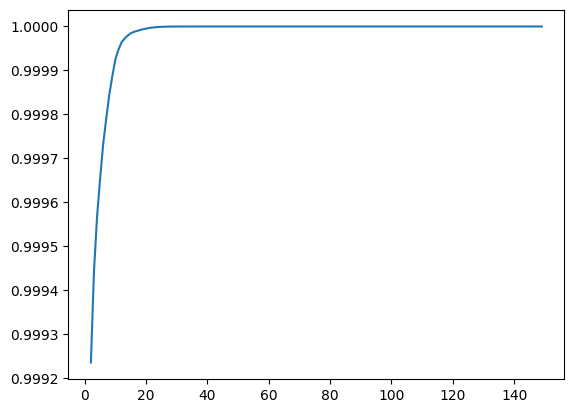

In [91]:
pd.Series(var_ratio).plot()

In [92]:
final_model = XGBClassifier()

smt = SMOTETomek(random_state=42, sampling_strategy='minority', n_jobs=-1)

X_res, y_res = smt.fit_resample(X_const, y)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res , test_size = 0.2, random_state = 42)

final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [96]:
print(f"train accurary score : {final_model.score(X_train,y_train)}")
print(f"Test accurary score : {accuracy_score(y_pred,y_test)}")

train accurary score : 0.9999821759589335
Test accurary score : 0.9964351917866818


In [97]:
print(f"total_cost : {total_cost(y_test, y_pred)}")

total_cost : 2950


/Users/wilson/Documents/Jobsearch/ineuron/sensor-fault-detecting/notebook/env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


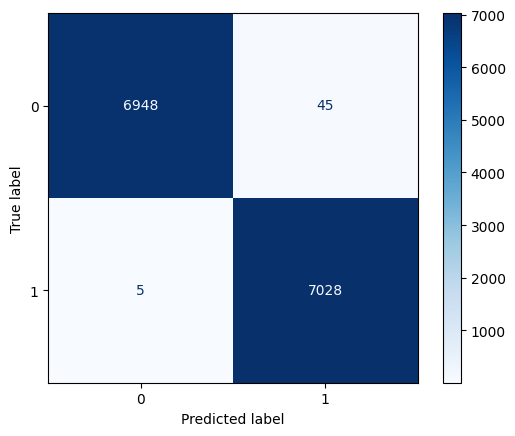

In [98]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(final_model, X_test, y_test, cmap= 'Blues', values_format='d')